<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
!pip install -q tensorflow-gpu==2.8.2
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 497.9 MB 14 kB/s 
2.8.2


In [2]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [4]:
# Number of classes
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [5]:
# Build th model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu') (x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and fit 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5696 - accuracy: 0.4290 - val_loss: 1.2764 - val_accuracy: 0.5340
Epoch 2/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2677 - accuracy: 0.5454 - val_loss: 1.1262 - val_accuracy: 0.5991
Epoch 3/15
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1474 - accuracy: 0.5905 - val_loss: 1.0421 - val_accuracy: 0.6283
Epoch 4/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0526 - accuracy: 0.6251 - val_loss: 1.0017 - val_accuracy: 0.6546
Epoch 5/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9801 - accuracy: 0.6507 - val_loss: 0.9560 - val_accuracy: 0.6684
Epoch 6/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9141 - accuracy: 0.6744 - val_loss: 0.9001 - val_accuracy: 0.6834
Epoch 7/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8663 - accuracy: 0.6928 - val_loss: 0.8870 -

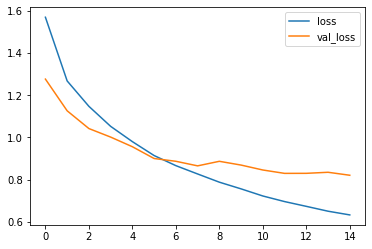

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

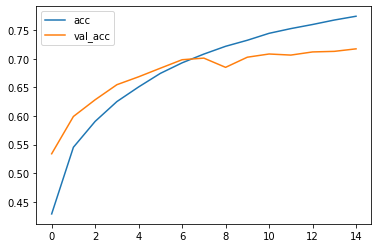

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[784  21  39  11  19   2  16  12  52  44]
 [ 13 870   2   8   4   3   9   1  31  59]
 [ 75   7 575  55  80  57  99  30  12  10]
 [ 19  10  68 508  54 156 123  30  16  16]
 [ 33   5  51  61 627  36 115  59  12   1]
 [ 13   7  56 200  42 574  61  33   8   6]
 [  9   9  21  39  16  18 878   3   3   4]
 [ 22   2  26  40  58  62  20 750   5  15]
 [ 73  31  11  14   8   4   6   5 827  21]
 [ 24 112   4  24   7   6  15  11  18 779]]


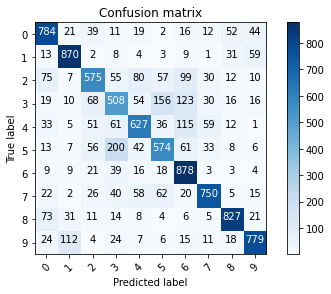

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting normalize=True 
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [10]:
# Labels mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frong
horse
ship
truck'''.split()

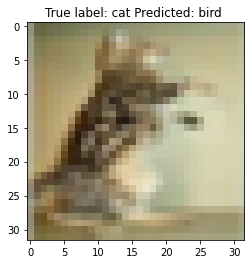

In [12]:
# Show some misclassified 
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s " % (labels[y_test[i]], labels[p_test[i]]));